# Baixe a base de dados completa e carregue dentro de DataFrame do pandas.



In [290]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from scipy import stats

# Download dataset from GitHub and load into DataFrame
url = 'https://raw.githubusercontent.com/jralbbuquerque/desafio-fadesp-processo-seletivo/master/data/dataset_desafio_fadesp.csv'
df = pd.read_csv(url,error_bad_lines=False, encoding='ISO-8859-1')

<ipython-input-290-c0045ede80fa>:10: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





# Realize um processo limpeza nos dados removendo ou substituindo os valores nulos quando necessário, e eliminando dados duplicados e inconsistentes caso exista algum.


In [291]:
# criando uma lista com os novos nomes das colunas 
Novos_nomes = ['ID do registro','Identificação do pedido','Data do pedido',
               'Data de envio do pedido','Modo de envio do pedido','Identificação do cliente',
               'Nome do cliente','Segemento','Cidade para entrega','Estado_para_entrega',
               'País para entrega','Código postal para entrega','Mercado','Continente',
               'Identificação do produto','Categoria do produto','Sub-categoria do produto',
               'Nome_do_produto','Valor da venda realizada','Quantidade_de_produtos_vendidos',
               'Desconto realizado','Lucro','Valor do frete','Prioridade do pedido']

#renomeaar colunas 
df.columns = Novos_nomes

In [292]:
#Criando a coluna Preço dividindo a coluna valor da venda pela quantidade de produtos vendidos 
df["Valor_Produto"] = df['Valor da venda realizada'] / df['Quantidade_de_produtos_vendidos']

In [293]:
# Verificando os valores NAN
df.isna().sum()

ID do registro                         0
Identificação do pedido                0
Data do pedido                         0
Data de envio do pedido                0
Modo de envio do pedido                0
Identificação do cliente               0
Nome do cliente                        0
Segemento                              0
Cidade para entrega                    0
Estado_para_entrega                    0
País para entrega                      0
Código postal para entrega         41296
Mercado                                0
Continente                             0
Identificação do produto               0
Categoria do produto                   0
Sub-categoria do produto               0
Nome_do_produto                        0
Valor da venda realizada               0
Quantidade_de_produtos_vendidos        0
Desconto realizado                     0
Lucro                                  0
Valor do frete                         0
Prioridade do pedido                   0
Valor_Produto   

In [294]:
# Como existem muitos valores "NAN", valos substituir esses valores por "0".
df = df.fillna(0)
# Exibir Dataframe sem valores missing
df.isna().sum()

ID do registro                     0
Identificação do pedido            0
Data do pedido                     0
Data de envio do pedido            0
Modo de envio do pedido            0
Identificação do cliente           0
Nome do cliente                    0
Segemento                          0
Cidade para entrega                0
Estado_para_entrega                0
País para entrega                  0
Código postal para entrega         0
Mercado                            0
Continente                         0
Identificação do produto           0
Categoria do produto               0
Sub-categoria do produto           0
Nome_do_produto                    0
Valor da venda realizada           0
Quantidade_de_produtos_vendidos    0
Desconto realizado                 0
Lucro                              0
Valor do frete                     0
Prioridade do pedido               0
Valor_Produto                      0
dtype: int64

In [295]:
# Substituindo caracteres da data de pedido
df['Data do pedido'] = df['Data do pedido'].str.replace('-', '/')
# Separando a data de pedido em Dia, Mês e Ano.
df[['Dia', 'Mes', 'Ano']] = df['Data do pedido'].str.split('/', expand=True)

In [296]:
# Transformando dados String em datatime
def converter():
  df['Data do pedido'] = pd.to_datetime(df['Data do pedido'])
  df['Data de envio do pedido'] = pd.to_datetime(df['Data de envio do pedido'])
converter()
# Parametrizando para o mesmo formato
df['Data do pedido'] = df['Data do pedido'].dt.strftime('%d/%m/%Y')
df['Data de envio do pedido'] = df['Data de envio do pedido'].dt.strftime('%d/%m/%Y')
converter()

<ipython-input-296-283831c4b47c>:3: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-296-283831c4b47c>:4: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-296-283831c4b47c>:3: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-296-283831c4b47c>:4: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [297]:
# Calculando o tempo de entrega em dias
df['Tempo_Entrega']= df['Data de envio do pedido'] - df['Data do pedido']

# Utilize técnicas de visualização de dados para explorar a distribuição dos dados.


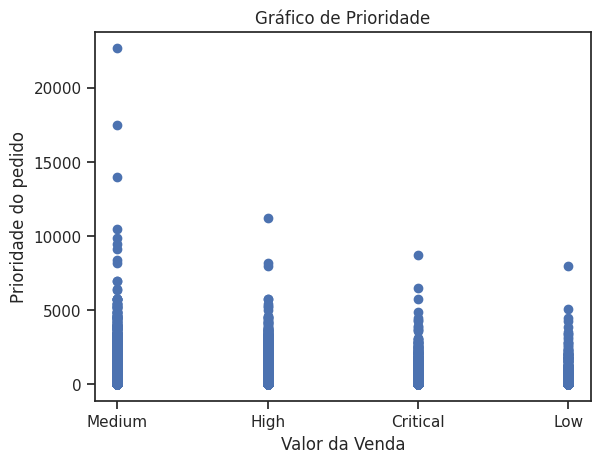

In [ ]:

plt.scatter(df['Prioridade do pedido'], df['Valor da venda realizada'])
plt.xlabel('Valor da Venda')
plt.ylabel('Prioridade do pedido')
plt.title('Gráfico de Prioridade')
plt.show()

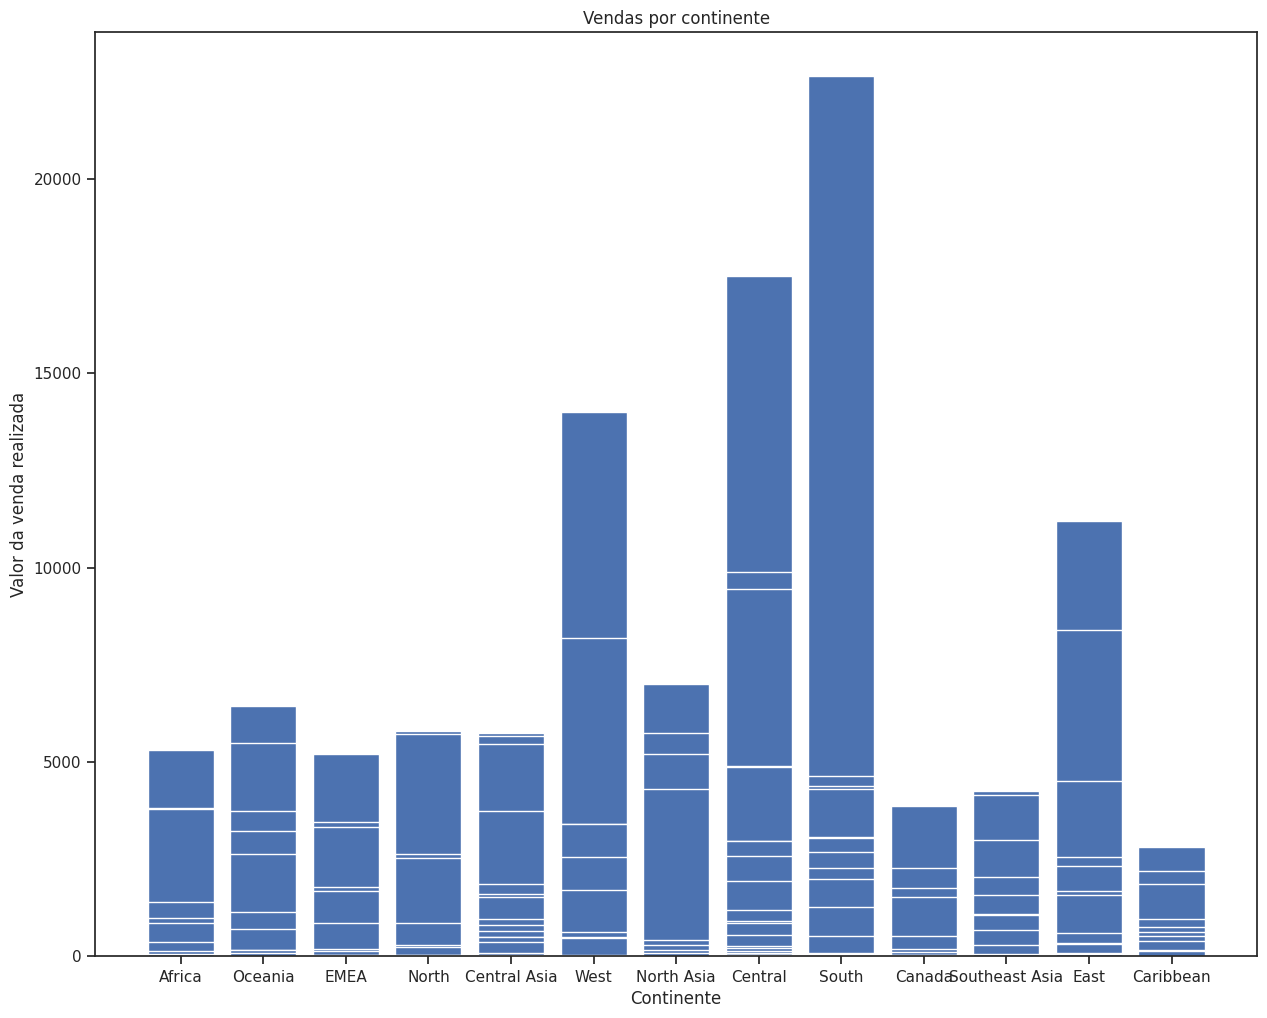

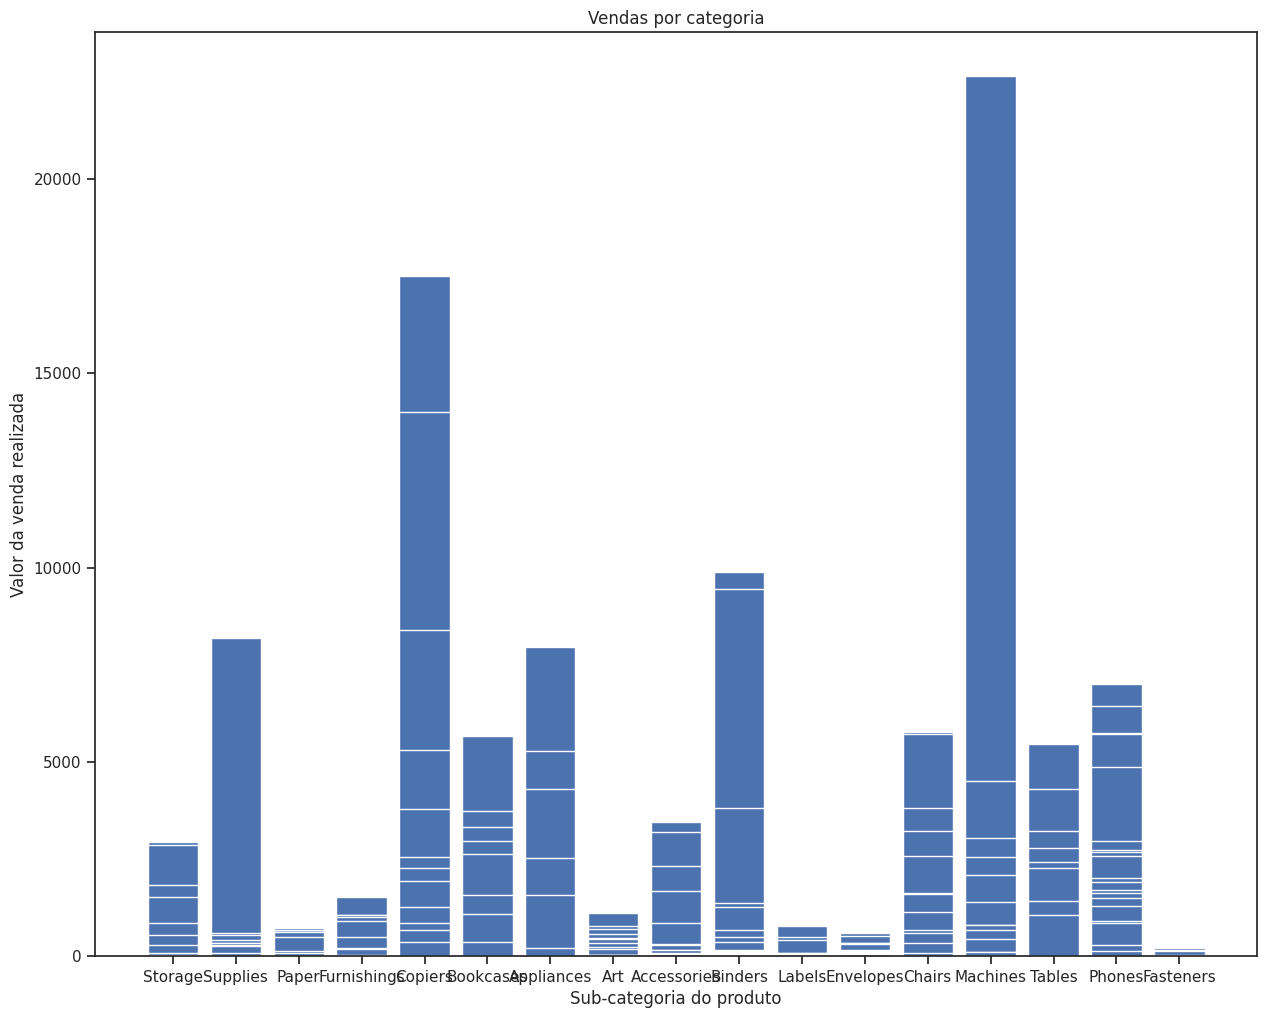

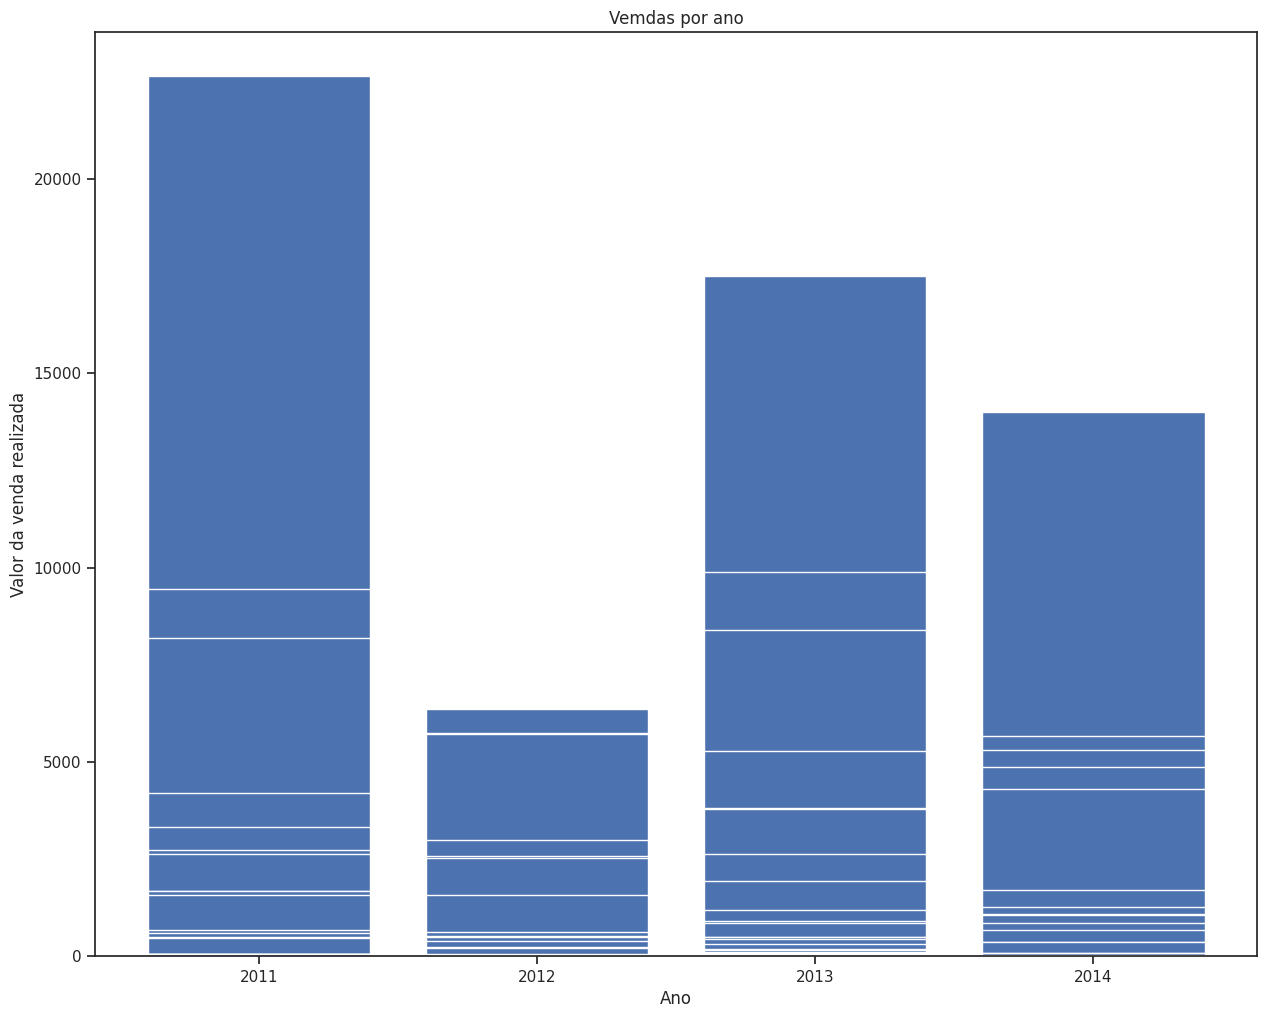

In [ ]:
def scatter(df, column,a):
    plt.figure(figsize=(15, 12))
    plt.bar(df[column] , df['Valor da venda realizada'])
    plt.ylabel('Valor da venda realizada')
    plt.xlabel(column)
    plt.title(a)
    
scatter(df,'Continente','Vendas por continente')
scatter(df,'Sub-categoria do produto','Vendas por categoria')
scatter(df,'Ano','Vemdas por ano')

# Identifique os produtos mais vendidos e analise sua distribuição geográfica.



In [ ]:
# Selecionar as colunas mais interessantes
mais_vendidos = df.groupby(['Estado_para_entrega','Nome_do_produto',
                            'Quantidade_de_produtos_vendidos'])['Valor da venda realizada'].sum().reset_index()
# Irei selecionar os 10 estados com maior numero de vendas
a = mais_vendidos['Estado_para_entrega'].value_counts().head(10)
names_estado = a.index

In [ ]:
# Retornar apenas os 10 estados mais com mais vendas do DataFrame
def seleciona_valores(df, lista, coluna):
    novo_df = df[df[coluna].isin(lista)].copy()
    return novo_df

dez_estados = seleciona_valores(mais_vendidos,names_estado,'Estado_para_entrega')

In [ ]:
# Selecionando os 10 produtos mais vendidos 
b = mais_vendidos['Nome_do_produto'].value_counts().head(10)
names_estado = b.index

def seleciona_valores(df, lista, coluna):
    novo_df = df[df[coluna].isin(lista)].copy()
    return novo_df

dez_produtos = seleciona_valores(mais_vendidos,names_estado,'Nome_do_produto')

In [ ]:
dez_produtos['Nome_do_produto'].value_counts()

Staples                                  120
Cardinal Index Tab, Clear                 90
Eldon File Cart, Single Width             87
Rogers File Cart, Single Width            79
Sanford Pencil Sharpener, Water Color     77
Ibico Index Tab, Clear                    77
Smead File Cart, Single Width             76
Stanley Pencil Sharpener, Water Color     74
Acco Index Tab, Clear                     74
Avery Index Tab, Clear                    72
Name: Nome_do_produto, dtype: int64

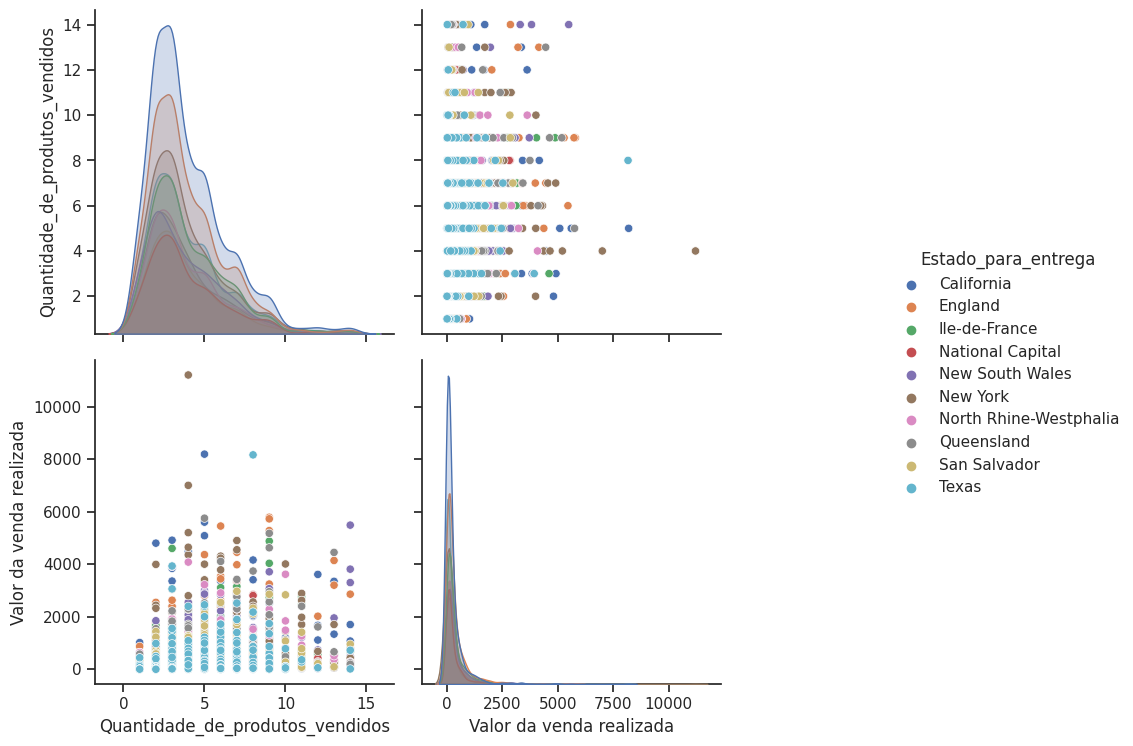

In [ ]:
#Distribuição de vendas por estado
import seaborn as sns
sns.set_theme(style="ticks")
ax = sns.pairplot(dez_estados,hue="Estado_para_entrega")
ax.figure.set_size_inches(12, 8)

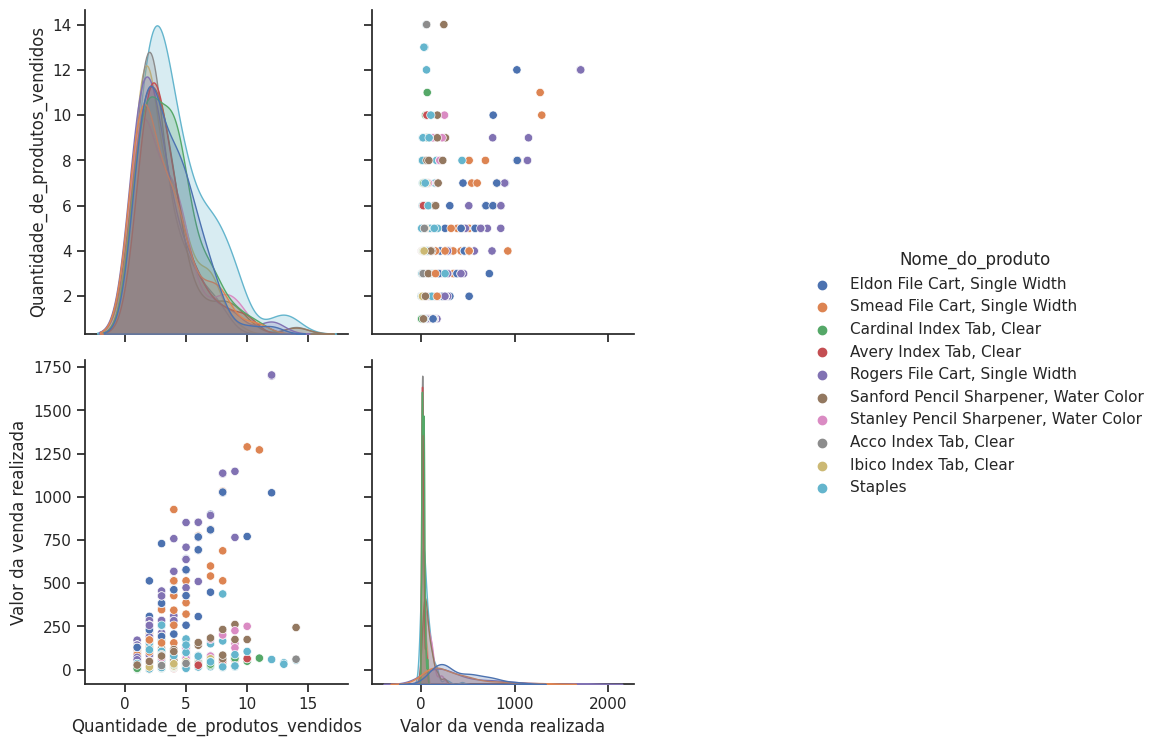

In [ ]:
#Distribuição de vendas por produto
import seaborn as sns
sns.set_theme(style="ticks")
ax = sns.pairplot(dez_produtos,hue="Nome_do_produto")
ax.figure.set_size_inches(12, 8)

# Analise a relação entre as vendas e outras variáveis, como o tempo de entrega e o preço dos produtos.

In [ ]:
dados_numericos = df.select_dtypes(include=[float, int])

# Calculando a correlação entre todas as variáveis numéricas e a coluna "Valor da venda realizada"
correlacao = dados_numericos.corr()['Valor da venda realizada']

# Ordenando as correlações em ordem decrescente
correlacao = correlacao.sort_values(ascending=False)

print(correlacao)

Valor da venda realizada           1.000000
Valor_Produto                      0.809084
Valor do frete                     0.768073
Lucro                              0.484918
Quantidade_de_produtos_vendidos    0.313577
Código postal para entrega        -0.021402
ID do registro                    -0.043889
Desconto realizado                -0.086722
Name: Valor da venda realizada, dtype: float64


In [ ]:
# Selecionando as colunas que mais podem influenciar na venda
corr = df[['Tempo_Entrega','Valor da venda realizada','Quantidade_de_produtos_vendidos','Valor do frete','Valor_Produto']].corr()
corr

<ipython-input-267-6e2c25b5e886>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Valor da venda realizada,Quantidade_de_produtos_vendidos,Valor do frete,Valor_Produto
Valor da venda realizada,1.000000,0.313577,0.768073,0.809084
Quantidade_de_produtos_vendidos,0.313577,1.000000,0.272649,-0.010161
Valor do frete,0.768073,0.272649,1.000000,0.631532
Valor_Produto,0.809084,-0.010161,0.631532,1.000000


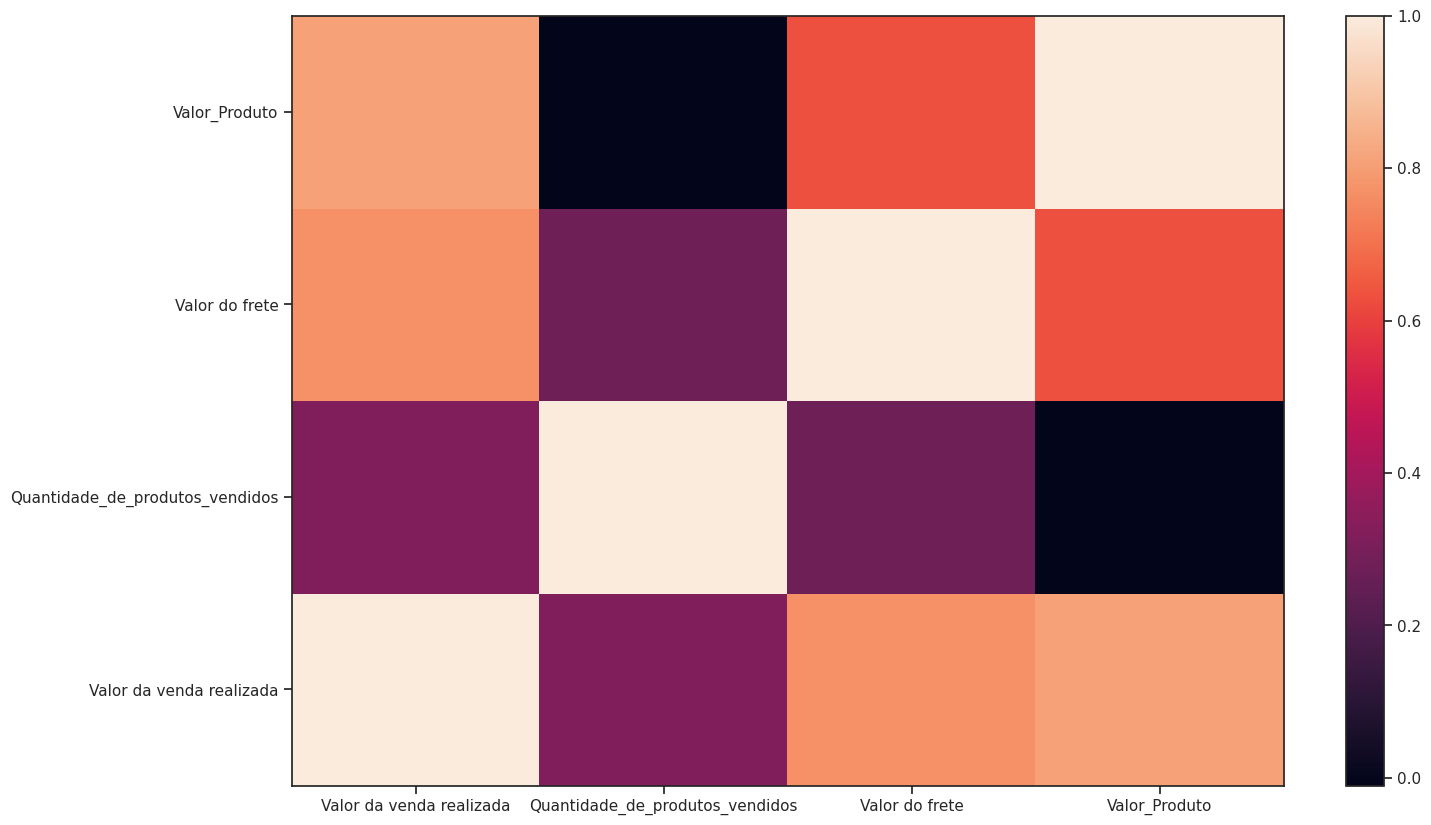

In [ ]:
fig = plt.figure(figsize=(16, 10))
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

In [ ]:
df.columns

Index(['ID do registro', 'Identificação do pedido', 'Data do pedido',
       'Data de envio do pedido', 'Modo de envio do pedido',
       'Identificação do cliente', 'Nome do cliente', 'Segemento',
       'Cidade para entrega', 'Estado_para_entrega', 'País para entrega',
       'Código postal para entrega', 'Mercado', 'Continente',
       'Identificação do produto', 'Categoria do produto',
       'Sub-categoria do produto', 'Nome_do_produto',
       'Valor da venda realizada', 'Quantidade_de_produtos_vendidos',
       'Desconto realizado', 'Lucro', 'Valor do frete', 'Prioridade do pedido',
       'Valor_Produto', 'Dia', 'Mes', 'Ano', 'Tempo_Entrega'],
      dtype='object')

#SQLITE

In [324]:
conn = sqlite3.connect('dataset.db')

# Armazenamento do dataframe no banco de dados SQLite
df.to_sql('dados', conn, if_exists='replace', index=False)

# Consultas SQL no banco de dados SQLite
query = '''
        SELECT [ID do registro], [Identificação do pedido], [Data do pedido],
               [Data de envio do pedido], [Modo de envio do pedido],
               [Identificação do cliente], [Nome do cliente], Segemento,
               [Cidade para entrega], [Estado_para_entrega], [País para entrega],
               [Código postal para entrega], Mercado, Continente,
               [Identificação do produto], [Categoria do produto],
               [Sub-categoria do produto], [Nome_do_produto],
               [Valor da venda realizada], [Quantidade_de_produtos_vendidos],
               [Desconto realizado], Lucro, [Valor do frete], [Prioridade do pedido],
               Valor_Produto, Dia, Mes, Ano, Tempo_Entrega
        FROM dados
        '''

resultado = pd.read_sql_query(query, conn)

<ipython-input-324-ddd6f0610443>:4: UserWarning:

the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.



In [328]:
# Query para ver o numero de pedidos por ano
query2 = '''
SELECT Ano, COUNT([Identificação do pedido]) AS 'Pedidos Realizados'
FROM dados
GROUP BY Ano;
'''
pedidos_ano = pd.read_sql_query(query2,conn)
print(pedidos_ano)

    Ano  Pedidos Realizados
0  2011                8998
1  2012               10962
2  2013               13799
3  2014               17531


In [329]:
#Lucro por Pais
query3 = '''
SELECT [País para entrega], AVG(Lucro) AS 'Lucro Médio'
FROM dados
GROUP BY [País para entrega];
'''
lucro_pais = pd.read_sql_query(query3,conn)
print(lucro_pais)

    País para entrega  Lucro Médio
0         Afghanistan    99.278182
1             Albania    44.332500
2             Algeria    46.461735
3              Angola    53.237459
4           Argentina   -47.932812
..                ...          ...
142         Venezuela   -57.849023
143           Vietnam    -7.057474
144             Yemen  -123.548600
145            Zambia    68.644412
146          Zimbabwe   -67.859812

[147 rows x 2 columns]


In [331]:
# Produto por Pais 
query_4 = '''
SELECT [País para entrega], [Nome_do_produto], SUM([Quantidade_de_produtos_vendidos]) AS 'Quantidade Vendida'
FROM dados
GROUP BY [País para entrega], [Nome_do_produto]
HAVING SUM([Quantidade_de_produtos_vendidos]) >= 50
ORDER BY [País para entrega], SUM([Quantidade_de_produtos_vendidos]) DESC;
'''
produtos_pais = pd.read_sql_query(query_4,conn)
print(produtos_pais)

   País para entrega                                    Nome_do_produto  \
0      United States                                            Staples   
1      United States                         KI Adjustable-Height Table   
2      United States                            Storex Dura Pro Binders   
3      United States                            Avery Non-Stick Binders   
4      United States  GBC Premium Transparent Covers with Diagonal L...   
5      United States         Situations Contoured Folding Chairs, 4/Set   
6      United States                        Eldon Wave Desk Accessories   
7      United States                 Chromcraft Round Conference Tables   
8      United States  Wilson Jones Turn Tabs Binder Tool for Ring Bi...   
9      United States    Global Wood Trimmed Manager's Task Chair, Khaki   
10     United States         Kingston Digital DataTraveler 16GB USB 2.0   
11     United States                  Fellowes Officeware Wire Shelving   
12     United States     

In [332]:
queri = '''
SELECT [Categoria do produto], SUM([Valor da venda realizada]) AS 'Receita Total', SUM(Lucro) AS 'Margem de Lucro'
FROM dados
GROUP BY [Categoria do produto];
'''
lucro_cat = pd.read_sql_query(queri,conn)
print(lucro_cat)

  Categoria do produto  Receita Total  Margem de Lucro
0            Furniture   4.110874e+06     285204.72380
1      Office Supplies   3.787070e+06     518473.83430
2           Technology   4.744557e+06     663778.73318


# Machine Learning

In [298]:
data_machine = df.groupby([ 'Categoria do produto','Quantidade_de_produtos_vendidos','Valor_Produto',
                           'Valor do frete','Desconto realizado','Tempo_Entrega'])['Valor da venda realizada'].sum().reset_index()
data_machine['Tempo_Entrega'] = data_machine['Tempo_Entrega'].astype(int)

In [299]:
from sklearn.preprocessing import LabelEncoder


# Codificar as variáveis categóricas
le = LabelEncoder()
data_machine['Categoria do produto'] = le.fit_transform(data_machine['Categoria do produto'])

In [300]:
data_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51263 entries, 0 to 51262
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Categoria do produto             51263 non-null  int64  
 1   Quantidade_de_produtos_vendidos  51263 non-null  int64  
 2   Valor_Produto                    51263 non-null  float64
 3   Valor do frete                   51263 non-null  float64
 4   Desconto realizado               51263 non-null  float64
 5   Tempo_Entrega                    51263 non-null  int64  
 6   Valor da venda realizada         51263 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 2.7 MB


*Importando Bibliotecas Para Machine Learning*

In [301]:
# Importando as bibliotecas necessárias
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [302]:
# Divide os dados em conjunto de treinamento e teste
X = data_machine.drop('Valor da venda realizada', axis=1)
y = data_machine['Valor da venda realizada']
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=0)

*Regreção Linear*

In [303]:
# Normaliza as características
scaler = StandardScaler()
X_treinamento = scaler.fit_transform(X_treinamento)
X_teste = scaler.transform(X_teste)

# Treina o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_treinamento, y_treinamento)

# Faz previsões no conjunto de teste
y_predito = modelo.predict(X_teste)


In [304]:
# Calcula as métricas de avaliação
mse = mean_squared_error(y_teste, y_predito)
mae = mean_absolute_error(y_teste, y_predito)
mape = mean_absolute_percentage_error(y_teste, y_predito)

# Exibe as métricas de avaliação
print('MSE:', mse)
print('MAE:', mae)
print('MAPE:', mape)

MSE: 35420.01786519786
MAE: 99.82855230838511
MAPE: 2.584684827249976


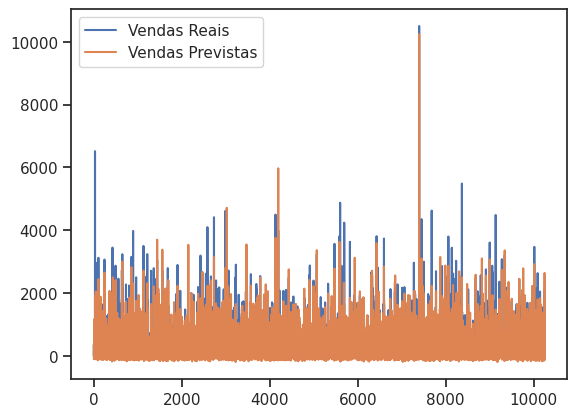

In [305]:
# Cria um gráfico comparativo entre as vendas reais e as vendas previstas
plt.plot(y_teste.values, label='Vendas Reais')
plt.plot(y_predito, label='Vendas Previstas')
plt.legend()
plt.show()

In [306]:
# Salva o modelo treinado em um arquivo Pickle
with open('modelo_de_vendas_RL.pickle', 'wb') as f:
    pickle.dump(modelo, f)

*Arvore de  Decisão*

In [307]:

# Divide o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria o modelo de árvore de decisão
modelA = DecisionTreeRegressor()

# Treina o modelo com os dados de treinamento
modelA.fit(X_train, y_train)

# Faz as previsões com o conjunto de teste
y_pred = modelA.predict(X_test)


In [308]:
# Calcula as métricas de avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Imprime as métricas de avaliação
print('MSE:', mse)
print('MAE:', mae)
print('MAPE:', mape)


MSE: 8738.464492850591
MAE: 5.765676878962254
MAPE: 0.006910946694699186


In [309]:
# Salva o modelo treinado em um arquivo Pickle
with open('modelo_de_vendas_Arvore.pickle', 'wb') as f:
    pickle.dump(modelA, f)

*Random Forest*

In [310]:

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando o modelo de Random Forest
modelR = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo com os dados de treino
modelR.fit(X_train, y_train)

# Realizando as previsões com os dados de teste
y_pred = modelR.predict(X_test)


In [311]:
# Calculando as métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Imprimindo as métricas de avaliação
print('MSE:', mse)
print('MAE:', mae)
print('MAPE:', mape)

MSE: 6691.06506388709
MAE: 3.7524097251966952
MAPE: 0.00505065048306456


In [312]:
# Salva o modelo treinado em um arquivo Pickle
with open('modelo_de_vendas_RANDOM.pickle', 'wb') as f:
    pickle.dump(modelR, f)

*XGBoost*

In [313]:
# Instanciando o modelo
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          max_depth=10,n_estimators=1000,
                          min_child_weight=0.5,
                          colsample_bytree=0.8,
                          subsample=0.8,
                          eta=0.1,
                          n_jobs=5,
                          seed=42)

# Treinando o modelo
xg_reg.fit(X_train,y_train)
# Fazendo previsões
preds = xg_reg.predict(X_test)

# model = xgb.XGBRegressor(
#     max_depth=10,
#     n_estimators=1000,
#     min_child_weight=0.5,
#     colsample_bytree=0.8,
#     subsample=0.8,
#     eta=0.1,
#     n_jobs=5,
#     seed=42)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

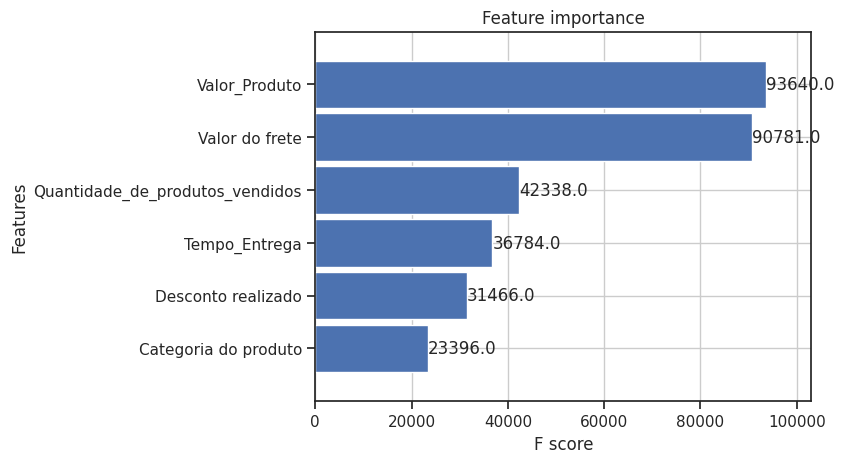

In [314]:
# Features mais importantes para o  modelo
xgb.plot_importance(xg_reg,height=0.9)


In [315]:
# Avaliando o modelo
rmse = np.sqrt(mean_squared_error(y_test, preds))
# Calculando as métricas de avaliação
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
mape = mean_absolute_percentage_error(y_test, preds)

# Imprimindo as métricas de avaliação
print('MSE:', mse)
print('MAE:', mae)
print('MAPE:', mape)
print("RMSE: %f" % (rmse))

MSE: 6419.3661192011705
MAE: 17.697211718554943
MAPE: 0.06330095645834355
RMSE: 80.120947


In [316]:
# Salva o modelo treinado em um arquivo Pickle
with open('modelo_de_vendas_XG.pickle', 'wb') as f:
    pickle.dump(xg_reg, f)

*Rede Neural*

In [317]:
# Normalizando os dados de entrada
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de rede neural
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])


In [318]:
# Compilando o modelo
model.compile(optimizer='adam', loss='mse')

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
1282/1282 [==============================] - 4s 2ms/step - loss: 89318.5469 - val_loss: 33353.0938
Epoch 2/50
1282/1282 [==============================] - 3s 2ms/step - loss: 28042.1406 - val_loss: 17321.4824
Epoch 3/50
1282/1282 [==============================] - 3s 2ms/step - loss: 15461.4531 - val_loss: 8996.9980
Epoch 4/50
1282/1282 [==============================] - 4s 3ms/step - loss: 9808.6465 - val_loss: 5587.6123
Epoch 5/50
1282/1282 [==============================] - 3s 2ms/step - loss: 7514.2983 - val_loss: 4104.1528
Epoch 6/50
1282/1282 [==============================] - 3s 2ms/step - loss: 6526.0000 - val_loss: 5934.1187
Epoch 7/50
1282/1282 [==============================] - 3s 2ms/step - loss: 6350.8647 - val_loss: 3330.0654
Epoch 8/50
1282/1282 [==============================] - 4s 3ms/step - loss: 5321.4312 - val_loss: 2543.8621
Epoch 9/50
1282/1282 [==============================] - 4s 3ms/step - loss: 4484.8501 - val_loss: 3395.5798
Epoch 10/50
1282/1282 [

In [319]:
# Avaliando o modelo
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Acurácia (R²): %.2f" % r2)

321/321 [==============================] - 1s 1ms/step
Acurácia (R²): 1.00


In [320]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Imprimindo as métricas de avaliação
print('MSE:', mse)
print('MAE:', mae)
print('MAPE:', mape)


MSE: 188.49894281964376
MAE: 5.3311867935981025
MAPE: 0.07249463646040542


In [321]:
# Salva o modelo treinado em um arquivo Pickle
#melhor Modelo
with open('modelo_de_vendas_Neural.pickle', 'wb') as f:
    pickle.dump(model, f)